In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3)

import matplotlib.pyplot as plt
%matplotlib inline

# Negative sampling prob

In [2]:
probs = ['uniform', 'log_pop']
results = []
for prob in probs:
    df = pd.read_csv("log/{}.csv".format(prob))
    df['prob'] = prob
    results.append(df)
df = pd.concat(results)

In [3]:
print(df.groupby('prob').mean())
print(df.groupby('prob').std())

         precision%    recall%      NDCG
prob                                    
log_pop    5.345040  10.485260  0.379494
uniform    5.002066   9.891644  0.358387
         precision%   recall%      NDCG
prob                                   
log_pop    0.092571  0.289956  0.002193
uniform    0.154168  0.283841  0.011461


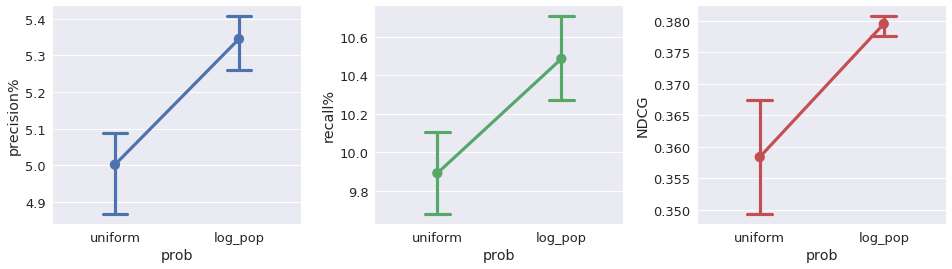

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)

for i, col in enumerate(df.columns[:-1]):
    sns.pointplot(x='prob', y=col, data=df, 
                  color='C{}'.format(i),
                  capsize=.2, ax=ax[i])
# fig.savefig("./img/negative_sampling_prob.png")

# tanh vs. relu

In [7]:
layers = [1,2,3]
activates = ['tanh', 'relu', 'hybrid']

results = []
for l in layers:
    for a in activates:
        df = pd.read_csv("log/conv{}_{}.csv".format(l, a))
        df['activation'] = a
        df['layer'] = l
        results.append(df)
df = pd.concat(results)

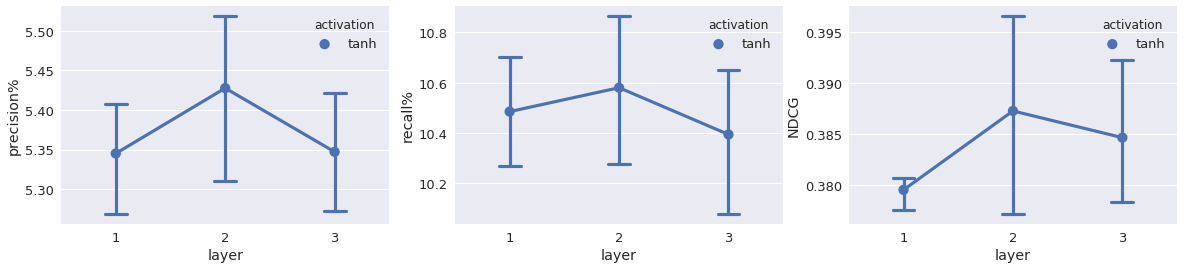

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
fig.subplots_adjust(wspace=0.2)

data = df[df.activation == 'tanh']
for i, col in enumerate(df.columns[:-2]):
    sns.pointplot(x='layer', y=col, data=data, hue='activation', capsize=.2, ax=ax[i])

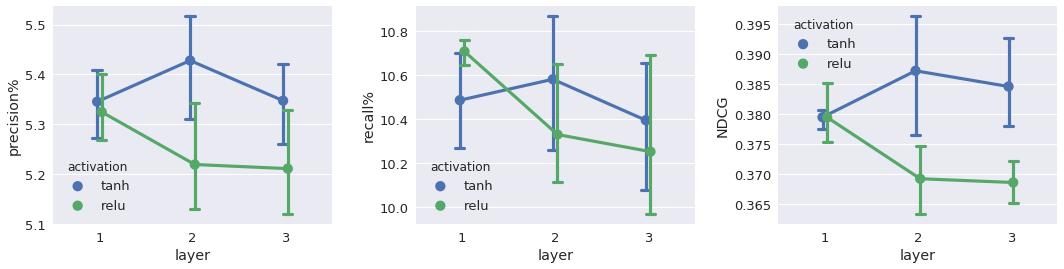

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
fig.subplots_adjust(wspace=0.3)

data = df[df.activation != 'hybrid']
for i, col in enumerate(df.columns[:-2]):
    sns.pointplot(x='layer', y=col, data=data, 
                  hue='activation', 
                  capsize=.1, dodge=True, ax=ax[i])
# fig.savefig("./img/num_layers.png")

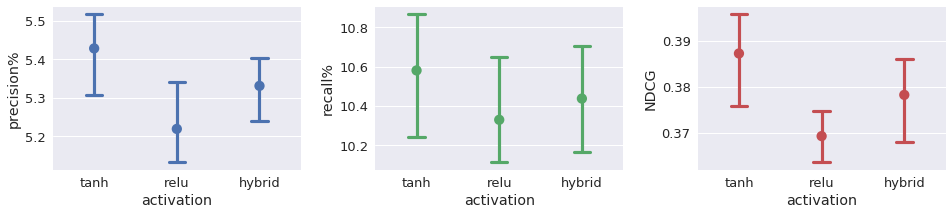

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,3))
fig.subplots_adjust(wspace=0.3)

data = df[df.layer == 2]
for i, col in enumerate(df.columns[:-2]):
    sns.pointplot(x='activation', y=col, data=data, 
                  capsize=.2, 
                  join=False,
                  color='C{}'.format(i), 
                  ax=ax[i])
# fig.savefig("./img/activation_func.png")

Thus, Tanh is better.

# Embedding dim

In [10]:
embeddings = [8, 16, 32, 48, 64, 100]
results = []
for e in embeddings:
    df = pd.read_csv("log/embedding{}.csv".format(e))
    df['embedding_dim'] = e
    results.append(df)
df = pd.concat(results)

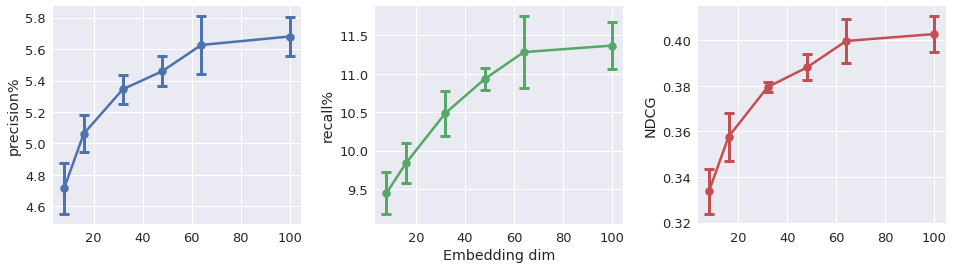

In [11]:
mean = df.groupby('embedding_dim').mean()
std = df.groupby('embedding_dim').std()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
fig.subplots_adjust(wspace=0.3)

for i, col in enumerate(mean.columns):
    ax[i].errorbar(mean.index, y=mean[col], yerr=std[col],
                   capsize=5, capthick=3,
                   elinewidth=3, linewidth=2.5,
                   color='C{}'.format(i),
                   marker='.', markersize=17)
    ax[i].set(ylabel=col)
ax[1].set(xlabel='Embedding dim')
# fig.savefig("./img/embedding_dim.png")

# Loss

In [13]:
losses = ['bpr', 'top1', 'hinge', 'bpr2']
results = []
for loss in losses:
    df = pd.read_csv("log/{}_loss.csv".format(loss))
    df['loss'] = loss.upper()
    results.append(df)
df = pd.concat(results)

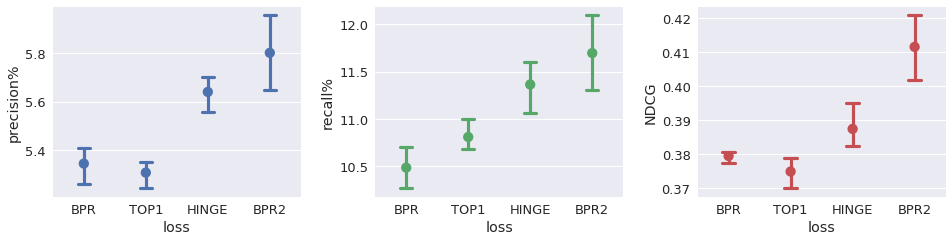

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,3.5))
fig.subplots_adjust(wspace=0.3)

for i, col in enumerate(df.columns[:-1]):
    sns.pointplot(x='loss', y=col, data=df, 
                  capsize=.2, 
                  join=False, 
                  color='C{}'.format(i), 
                  ax=ax[i])
# fig.savefig("./img/loss_function.png")

BPR2 is the best